In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
theta_oracled = [0, 0.7, 0.5, 0.4]

# Problem 1: oracle value
$$N \times max[\theta_j]=5000\times 0.7=3500$$

# Problem 2: The implement of algorithms

In [40]:
N = 5000

In [41]:
# epsilon-greedy with epsilon belonging to {0.1, 0.5, 0.9}

In [42]:
# UCB with c belonging to {1, 5, 10}
c_UCB = [1, 5, 10]

count_UCB = [0, 1, 1, 1]
theta_UCB = [0, 0, 0, 0]
theta_oracled = [0, 0.7, 0.5, 0.4]

def init_UCB():
    for t in range(1,4):
        arm = t
        count_UCB[arm] = 1
        r_I = np.random.binomial(1, theta_oracled[arm])
        theta_UCB[arm] = r_I

def UCB(n, c):
    init_UCB()
    for t in range(4, n + 1):
        arm = np.argmax([theta_UCB[i] + c * math.sqrt(2 * math.log(t) / count_UCB[i]) for i in range(1, 4)]) + 1
        count_UCB[arm] += 1
        r_I = np.random.binomial(1, theta_oracled[arm])
        theta_UCB[arm] += (r_I - theta_UCB[arm])/count_UCB[arm]
    reward = count_UCB[1] * theta_UCB[1] + count_UCB[2] * theta_UCB[2] + count_UCB[3] * theta_UCB[3] # aggregated reward
    gap = n * np.max(theta_oracled) - reward # gap between algorithm output and oracle value
    return reward, gap

In [43]:
# TS with {(1, 1), (1, 1), (1, 1)} and {(601, 401), (401, 601), (2, 3)}

# Problem 3 & 4
## (1) The results and discusion of impacts:

In [44]:
trails = 200

### 1. epsilon-greedy

In [45]:
# epsilon-greedy

"impact"

### 2. UCB

c =  1  rewards =  3412.405000000003  gaps =  87.59500000000014
c =  5  rewards =  2982.9050000000007  gaps =  517.095
c =  10  rewards =  2826.6399999999967  gaps =  673.3600000000001


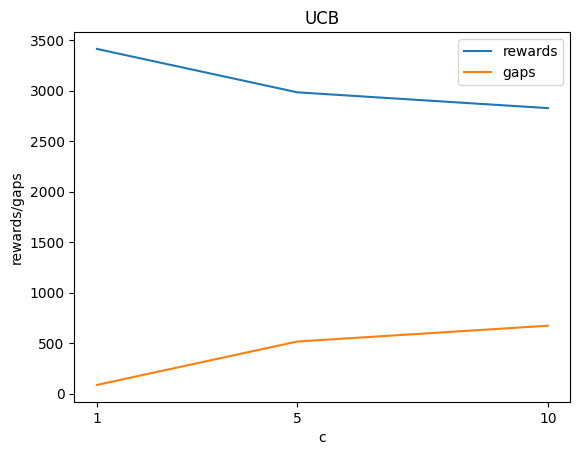

In [46]:
#UCB
rewards_UCB = np.zeros(len(c_UCB))
gaps_UCB = np.zeros(len(c_UCB))

for i in range(len(c_UCB)):
    for j in range(trails):
        reward_tem, gap_tem = UCB(N, c_UCB[i])
        rewards_UCB[i] += reward_tem / trails
        gaps_UCB[i] += gap_tem / trails
    print("c = ", c_UCB[i], " rewards = ", rewards_UCB[i], " gaps = ", gaps_UCB[i])

plt.plot(c_UCB, rewards_UCB)
plt.plot(c_UCB, gaps_UCB)
plt.legend(["rewards", "gaps"])
plt.xlabel("c")
plt.ylabel("rewards/gaps")
plt.title("UCB")
plt.xticks(c_UCB)
plt.show()

c =  1  rewards =  3411.324999999997  gaps =  88.67500000000133
c =  10  rewards =  2825.9899999999993  gaps =  674.0100000000004
c =  20  rewards =  2746.100000000001  gaps =  753.9000000000003
c =  30  rewards =  2719.3899999999976  gaps =  780.6100000000001
c =  40  rewards =  2702.2149999999992  gaps =  797.785
c =  50  rewards =  2696.43  gaps =  803.5699999999996


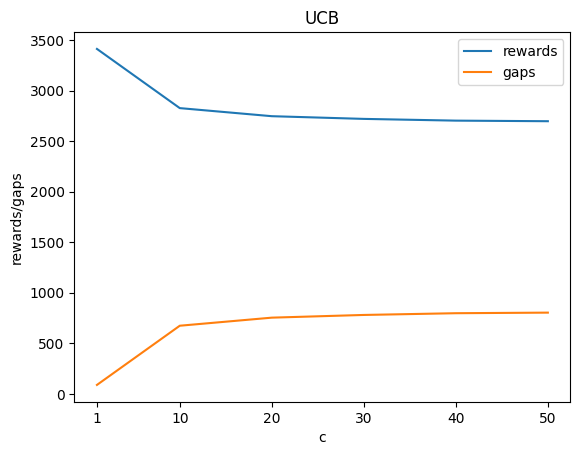

In [47]:
c_UCB = [1, 10, 20, 30, 40, 50]
rewards_UCB = np.zeros(len(c_UCB))
gaps_UCB = np.zeros(len(c_UCB))

for i in range(len(c_UCB)):
    for j in range(trails):
        reward_tem, gap_tem = UCB(N, c_UCB[i])
        rewards_UCB[i] += reward_tem / trails
        gaps_UCB[i] += gap_tem / trails
    print("c = ", c_UCB[i], " rewards = ", rewards_UCB[i], " gaps = ", gaps_UCB[i])

plt.plot(c_UCB, rewards_UCB)
plt.plot(c_UCB, gaps_UCB)
plt.legend(["rewards", "gaps"])
plt.xlabel("c")
plt.ylabel("rewards/gaps")
plt.title("UCB")
plt.xticks(c_UCB)
plt.show()

We can find that when $c=1$, the gap is smallest, the algorithm is best. With $c$ increasing, the gap would increase, too.

### 3. TS

In [48]:
# TS

## (2) Comparison:

# Problem 5: private understanding
## (1) epsilon-greedy
## (2) UCB
Everytime we have a try, we conclude the mean per arm up to now and the upper confidence bound(based on mean we get). Then the next time, we would try the arm who have highed upper confidence bound, so as to get bigger rewards. At last, we find we always choose one arm, which has biggest mean.
## (3) TS

# Problem 6: dependent case
## (1) Implement by the 3 original algorithms

In [ ]:
# ep

c =  1  rewards =  3466.9950000000017  gaps =  33.00500000000023
c =  5  rewards =  3272.509999999999  gaps =  227.49000000000026
c =  10  rewards =  3164.634999999998  gaps =  335.36500000000024
Arm 1 and arm 2 have same probability to get 1, arm 3 is independent.


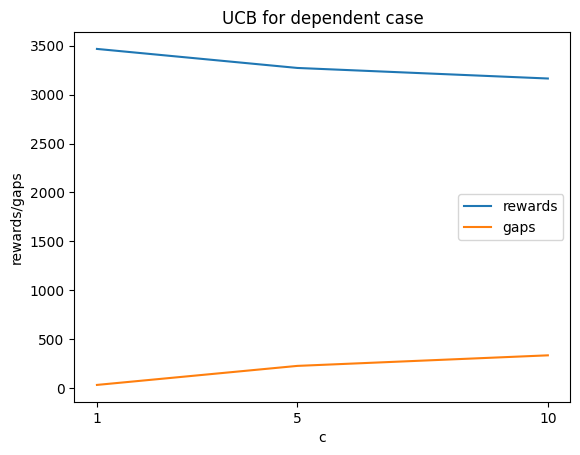

In [50]:
# UCB
theta_oracled = [0, 0.7, 0.7, 0.4]
c_UCB = [1, 5, 10]
#UCB
rewards_UCB = np.zeros(len(c_UCB))
gaps_UCB = np.zeros(len(c_UCB))

for i in range(len(c_UCB)):
    for j in range(trails):
        reward_tem, gap_tem = UCB(N, c_UCB[i])
        rewards_UCB[i] += reward_tem / trails
        gaps_UCB[i] += gap_tem / trails
    print("c = ", c_UCB[i], " rewards = ", rewards_UCB[i], " gaps = ", gaps_UCB[i])

print('Arm 1 and arm 2 have same probability to get 1, arm 3 is independent.')
plt.plot(c_UCB, rewards_UCB)
plt.plot(c_UCB, gaps_UCB)
plt.legend(["rewards", "gaps"])
plt.xlabel("c")
plt.ylabel("rewards/gaps")
plt.title("UCB for dependent case")
plt.xticks(c_UCB)
plt.show()

In [ ]:
# TS